In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
description = pd.read_csv('steamdataset/steam_description_data.csv')
media_data = pd.read_csv('steamdataset/steam_media_data.csv')
requirements_data = pd.read_csv('steamdataset/steam_requirements_data.csv')
support_info = pd.read_csv('steamdataset/steam_support_info.csv')
steam = pd.read_csv('steamdataset/steam.csv')
steam_tag_data = pd.read_csv('steamdataset/steamspy_tag_data.csv')

In [3]:
steam.sample(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
12113,558670,The Agency of Anomalies: Cinderstone Orphanage...,2016-11-21,1,Orneon,Big Fish Games,windows,0,Single-player,Adventure;Casual,Adventure;Casual;Hidden Object,0,3,0,0,0,0-20000,6.99
4780,347610,Hidden Object Bundle 4 in 1,2015-10-06,1,Alawar Entertainment,Alawar Entertainment,windows,0,Single-player;Steam Trading Cards,Casual,Casual;Hidden Object;Point & Click,0,144,10,0,0,20000-50000,5.59
26290,1011310,PARSE ALLY,2019-02-04,1,wHDinc.,wHDinc.,windows,0,Single-player;Steam Achievements,Action;Indie,Action;Indie,19,1,0,0,0,0-20000,2.09
25544,976340,You Can(Not) Survive,2018-12-12,1,DAX Entertainment,DAX Entertainment,windows,18,Single-player;Steam Achievements,Action;Indie;RPG;Early Access,Early Access;Action;Indie,89,18,3,0,0,0-20000,3.99
22750,872180,Charm Tale,2018-07-31,1,Puzzle Lab,Dikobraz Games,windows,0,Single-player,Adventure;Casual;Indie,Indie;Casual;Adventure,0,0,1,0,0,0-20000,7.19


appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64


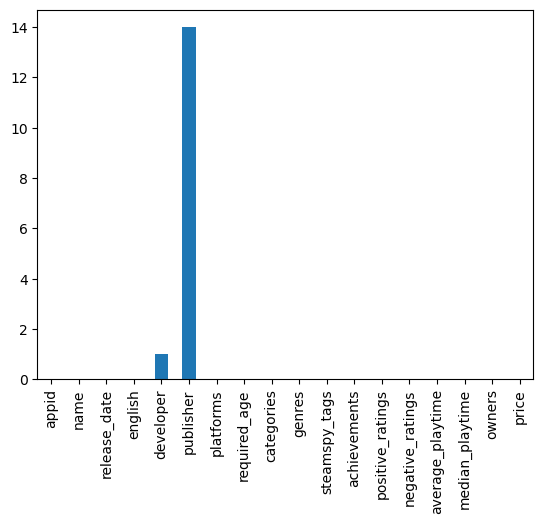

In [4]:
steam_na = steam.isna().sum()
print(steam_na)
steam_na.plot(kind='bar')
plt.show()


In [5]:
# since the number of missing values is small relativ to the dataset , im gonna drop those lines
original_df = steam.dropna() # steam.fillna('Missing')
original_df.isna().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [6]:
df = original_df.copy()
df['p_n_rating_ratio'] = np.where(df['negative_ratings'] == 0, np.nan, df['positive_ratings'] / df['negative_ratings']).round(2)
df.head(5)


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,p_n_rating_ratio
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,37.30
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,5.24
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,8.58
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,4.77
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,18.23


In [7]:
(df['price'] == 0).any()

True

In [8]:
def categorize_based_onprice(price):
    if price == 0 :
        return 'Free'
    else :
        return 'Paid'
df['price_category'] = df['price'].apply(categorize_based_onprice)


In [9]:
# take a look on the others data
media_data.sample(3)


,steam_appid,header_image,screenshots,background,movies
25160,951640,https://steamcdn-a.akamaihd.net/steam/apps/951...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/951...,"[{'id': 256730137, 'name': 'gameplay', 'thumbn..."
14016,613040,https://steamcdn-a.akamaihd.net/steam/apps/613...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/613...,"[{'id': 256688381, 'name': 'Update Trailer', '..."
21658,837440,https://steamcdn-a.akamaihd.net/steam/apps/837...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/837...,"[{'id': 256712933, 'name': 'BA minesweeper', '..."


In [10]:
description.sample(3)

,steam_appid,detailed_description,about_the_game,short_description
16818,697580,Lights blur. The crowd whizzes past. Your helm...,Lights blur. The crowd whizzes past. Your helm...,"Great, addictive, arcade-style gameplayDriving..."
13015,582890,<h1>Before Downloading</h1><p>Please ensure yo...,Estranged: Act II follows the story of a fishe...,Estranged: Act II follows the story of a fishe...
10636,517400,"<h2 class=""bb_tag"">This is a Room Escape Game<...","<h2 class=""bb_tag"">This is a Room Escape Game<...",Your task is to investigate an abandoned hospi...


In [11]:
steam_media_data = pd.merge(df,media_data,left_on='appid', right_on='steam_appid',how='left').drop(columns=['steam_appid'])
final_merged_df = pd.merge(steam_media_data,description,left_on='appid', right_on='steam_appid',how='left').drop(columns=['steam_appid'])
final_merged_df.sample(3).T

,14169,24168,19677
appid,619340,921850,781260
name,Conjuntalia,Jar Sam,Marco Polo
release_date,2017-07-27,2018-10-04,2018-02-08
english,1,1,1
developer,NEZOS GAMES,Dead Peach,Infogrames
publisher,NEZOS GAMES,Dead Peach,Classics Digital
platforms,windows;linux,windows,windows
required_age,0,0,0
categories,Single-player;Steam Achievements;Steam Trading...,Single-player;Steam Achievements,Single-player
genres,Adventure;Casual;Indie;Early Access,Indie,Action;Adventure;Simulation;Strategy


 The Game : Laserium is Paid and has the following PNR-Ratio 1.31  


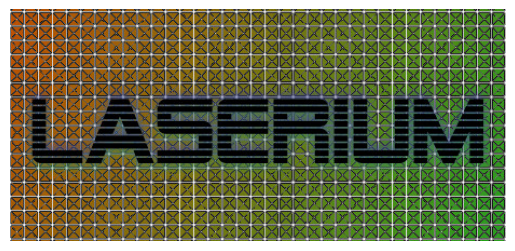

 The Game : Trauma is Paid and has the following PNR-Ratio 2.21  


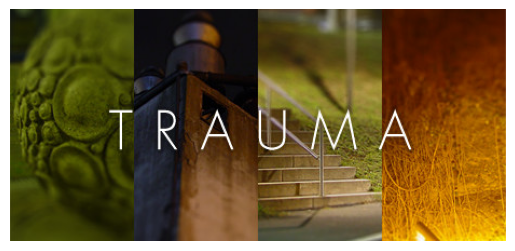

 The Game : Red Faction is Paid and has the following PNR-Ratio 8.79  


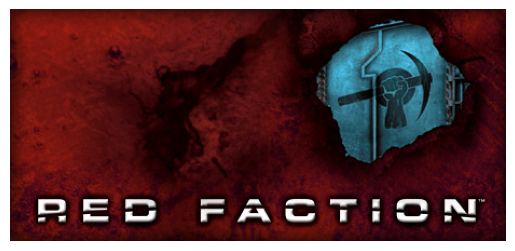

 The Game : Galactic Pocket Billiards is Paid and has the following PNR-Ratio 1.0  


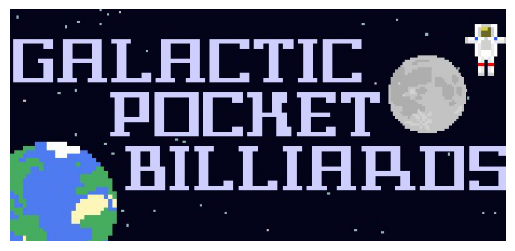

 The Game : Spy Fox 3 "Operation Ozone" is Paid and has the following PNR-Ratio 5.27  


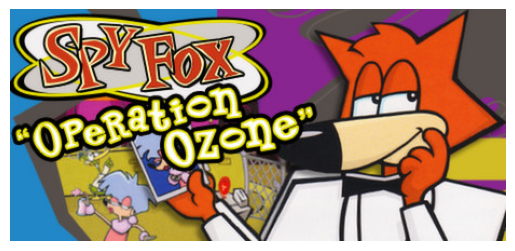

In [12]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
for index, row in final_merged_df.sample(5).iterrows():
    print(f" The Game : {row['name']} is {row['price_category']} and has the following PNR-Ratio {row['p_n_rating_ratio']}  ")
    response = requests.get(row['header_image'])
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')  
    plt.show()

In [13]:
#https://huggingface.co/WhereIsAI/UAE-Large-V1
from angle_emb import AnglE, Prompts
from sklearn.metrics.pairwise import cosine_distances
angle = AnglE.from_pretrained('WhereIsAI/UAE-Large-V1', pooling_strategy='cls').cuda()
doc_vecs = angle.encode([
    'The weather is great!',
    'The weather is very good!',
    'i am going to bed'
], normalize_embedding=True)
cosine_distances(doc_vecs)

/home/basheppo/anaconda3/envs/badr_env/lib/python3.12/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
/home/basheppo/anaconda3/envs/badr_env/lib/python3.12/site-packages/torch/cuda/__init__.py:716: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/basheppo/anaconda3/envs/badr_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not f

array([[0.        , 0.04937881, 0.6565592 ],
       [0.04937881, 0.        , 0.650071  ],
       [0.6565592 , 0.650071  , 0.        ]], dtype=float32)

In [14]:
description_embedding = angle.encode(final_merged_df['short_description'].to_list()[:100])
description_embedding.shape

(100, 1024)

In [15]:
# I need to remove the HTML tags from the description as they may impact the embeddings
from bs4 import BeautifulSoup
def clean_html(text):
    if pd.notnull(text):  
        return BeautifulSoup(text, 'html.parser').get_text()
    return text

final_merged_df['detailed_description'] = final_merged_df['detailed_description'].apply(clean_html)
final_merged_df.tail(5).T


/tmp/ipykernel_5957/1242083328.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


,27056,27057,27058,27059,27060
appid,1065230,1065570,1065650,1066700,1069460
name,Room of Pandora,Cyber Gun,Super Star Blast,New Yankee 7: Deer Hunters,Rune Lord
release_date,2019-04-24,2019-04-23,2019-04-24,2019-04-17,2019-04-24
english,1,1,1,1,1
developer,SHEN JIAWEI,Semyon Maximov,EntwicklerX,Yustas Game Studio,Adept Studios GD
publisher,SHEN JIAWEI,BekkerDev Studio,EntwicklerX,Alawar Entertainment,Alawar Entertainment
platforms,windows,windows,windows,windows;mac,windows;mac
required_age,0,0,0,0,0
categories,Single-player;Steam Achievements,Single-player,Single-player;Multi-player;Co-op;Shared/Split ...,Single-player;Steam Cloud,Single-player;Steam Cloud
genres,Adventure;Casual;Indie,Action;Adventure;Indie,Action;Casual;Indie,Adventure;Casual;Indie,Adventure;Casual;Indie


In [16]:
# im gonna take only the first 1000 based on postive negative ratio and num of owners
own_description = []
for idx,row in final_merged_df.iterrows():
    des = f"Game name : {row['name']} Developer {row['genres']} Summary : {row['detailed_description']} "
    own_description.append(des)
final_merged_df['own_description'] = own_description
final_merged_df.sample(3)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,p_n_rating_ratio,price_category,header_image,screenshots,background,movies,detailed_description,about_the_game,short_description,own_description
25901,992790,Switch & Ditch,2019-01-09,1,Tempera Games,Tempera Games,windows;mac,0,Multi-player;Local Multi-Player;Shared/Split S...,Action;Casual,...,6.00,Free,https://steamcdn-a.akamaihd.net/steam/apps/992...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/992...,"[{'id': 256741180, 'name': 'Release Trailer', ...",Steal The Spotlight!In the near future there i...,"<img src=""https://steamcdn-a.akamaihd.net/stea...",Steal the spotlight in the biggest game show o...,Game name : Switch & Ditch Developer Action;Ca...
12448,568440,Not Dying Today,2017-01-13,1,9TH.ART,Forever Entertainment S. A.,windows;mac,0,Single-player;Local Multi-Player;Local Co-op;S...,Violent;Gore;Action;Adventure;Casual;Indie,...,3.71,Paid,https://steamcdn-a.akamaihd.net/steam/apps/568...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/568...,"[{'id': 256676219, 'name': 'Trailer', 'thumbna...",Not dying today is a 2D side-scrolling action...,"<img src=""https://steamcdn-a.akamaihd.net/stea...",Not dying today is a 2D side-scrolling action ...,Game name : Not Dying Today Developer Violent;...
15005,651610,Booty Diver,2017-09-20,1,Xavier Orion Games,Xavier Orion Games,windows,0,Single-player;Full controller support,Action;Indie,...,NaN,Paid,https://steamcdn-a.akamaihd.net/steam/apps/651...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/651...,"[{'id': 256696294, 'name': 'Booty Diver Featur...",Grab That Booty!Take a dive into the perilous ...,"<h2 class=""bb_tag"">Grab That Booty!</h2><br>Ta...",Take a dive into the perilous depths of the oc...,Game name : Booty Diver Developer Action;Indie...


In [17]:
final_merged_df['min_owners'] = final_merged_df['owners'].apply(lambda n : int(n.split('-')[0]))
final_merged_df.sample(3).T

,7173,17634,15279
appid,413350,722240,658230
name,Daydream Blue,Devour them all,Chambered
release_date,2017-01-25,2017-10-12,2017-07-19
english,1,1,1
developer,RalphVR,Dexion Games,SegFault Games
publisher,RalphVR,Dexion Games,SegFault Games
platforms,windows,windows,windows
required_age,0,0,0
categories,Single-player;Online Multi-Player;Cross-Platfo...,Single-player,Single-player;Steam Achievements
genres,Adventure;Casual;Indie,Action;Casual;Indie,Violent;Action;Indie


In [18]:
df = final_merged_df.sort_values(['min_owners','p_n_rating_ratio'],ascending=[False,False]).iloc[:1000]
df.sample(3)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,price_category,header_image,screenshots,background,movies,detailed_description,about_the_game,short_description,own_description,min_owners
6088,382490,Relic Hunters Zero,2015-08-18,1,Rogue Snail,Rogue Snail,windows;mac,0,Single-player;Shared/Split Screen;Steam Achiev...,Action;Free to Play;Indie,...,Free,https://steamcdn-a.akamaihd.net/steam/apps/382...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/382...,"[{'id': 2040385, 'name': 'Relic Hunters Zero -...",A 100% FREE shooter from the creators of Chrom...,<i><strong>A 100% FREE shooter from the creato...,Relic Hunters Zero is a FREE game about shooti...,Game name : Relic Hunters Zero Developer Actio...,500000
1002,70000,Dino D-Day,2011-04-08,1,800 North and Digital Ranch,800 North and Digital Ranch,windows,0,Multi-player;Steam Achievements;Steam Trading ...,Action;Indie,...,Paid,https://steamcdn-a.akamaihd.net/steam/apps/700...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/700...,NaN,The year is 1942. Adolf Hitler has succeeded ...,The year is 1942. Adolf Hitler has succeeded ...,"Frantic, multiplayer action involving Nazis an...",Game name : Dino D-Day Developer Action;Indie ...,1000000
3575,313120,Stranded Deep,2015-01-23,1,Beam Team Games,Beam Team Pty Ltd,windows;mac;linux,0,Single-player;Full controller support;Includes...,Adventure;Indie;Early Access,...,Paid,https://steamcdn-a.akamaihd.net/steam/apps/313...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/313...,"[{'id': 2035994, 'name': 'Stranded Deep - Tea...",Take the role of a plane crash survivor strand...,Take the role of a plane crash survivor strand...,Take the role of a plane crash survivor strand...,Game name : Stranded Deep Developer Adventure;...,500000


In [128]:
df.to_csv('games_dataset.csv',index=False)

In [19]:
df['own_description'].iloc[0]

"Game name : Dota 2 Developer Action;Free to Play;Strategy Summary : The most-played game on Steam.Every day, millions of players worldwide enter battle as one of over a hundred Dota heroes. And no matter if it's their 10th hour of play or 1,000th, there's always something new to discover. With regular updates that ensure a constant evolution of gameplay, features, and heroes, Dota 2 has truly taken on a life of its own.One Battlefield. Infinite Possibilities.When it comes to diversity of heroes, abilities, and powerful items, Dota boasts an endless array—no two games are the same. Any hero can fill multiple roles, and there's an abundance of items to help meet the needs of each game. Dota doesn't provide limitations on how to play, it empowers you to express your own style.All heroes are free.Competitive balance is Dota's crown jewel, and to ensure everyone is playing on an even field, the core content of the game—like the vast pool of heroes—is available to all players. Fans can coll

In [20]:
batches = np.array_split(df['own_description'],100)
embs = []
for index,chunk in enumerate(batches):
    print(f"{index} /{len(batches)}")
    embs += list(angle.encode(list(chunk),to_numpy=True))
    
embs

/home/basheppo/anaconda3/envs/badr_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


0 /100
1 /100
2 /100
3 /100
4 /100
5 /100
6 /100
7 /100
8 /100
9 /100
10 /100
11 /100
12 /100
13 /100
14 /100
15 /100
16 /100
17 /100
18 /100
19 /100
20 /100
21 /100
22 /100
23 /100
24 /100
25 /100
26 /100
27 /100
28 /100
29 /100
30 /100
31 /100
32 /100
33 /100
34 /100
35 /100
36 /100
37 /100
38 /100
39 /100
40 /100
41 /100
42 /100
43 /100
44 /100
45 /100
46 /100
47 /100
48 /100
49 /100
50 /100
51 /100
52 /100
53 /100
54 /100
55 /100
56 /100
57 /100
58 /100
59 /100
60 /100
61 /100
62 /100
63 /100
64 /100
65 /100
66 /100
67 /100
68 /100
69 /100
70 /100
71 /100
72 /100
73 /100
74 /100
75 /100
76 /100
77 /100
78 /100
79 /100
80 /100
81 /100
82 /100
83 /100
84 /100
85 /100
86 /100
87 /100
88 /100
89 /100
90 /100
91 /100
92 /100
93 /100
94 /100
95 /100
96 /100
97 /100
98 /100
99 /100


[array([-0.22951744,  0.58372337, -0.44713852, ..., -0.13024245,
        -0.5841446 , -0.08106409], dtype=float32),
 array([-0.2368222 ,  0.33354628, -0.53209907, ..., -0.43901363,
        -0.7710132 , -0.08894142], dtype=float32),
 array([ 0.07501645, -0.04648224, -1.0076524 , ...,  0.40983364,
        -0.32858208, -0.14467534], dtype=float32),
 array([ 0.3740081 ,  0.23591323, -0.7328936 , ...,  0.06667129,
        -0.2949266 , -0.21232887], dtype=float32),
 array([-0.08392613,  0.36166304, -0.40562782, ...,  0.302865  ,
         0.02364924, -0.03827479], dtype=float32),
 array([ 0.46075487,  0.40085346, -0.81367683, ...,  0.23263626,
        -0.06314594, -0.04828376], dtype=float32),
 array([ 0.13307862,  0.5008913 , -0.43488166, ..., -0.94316876,
        -0.15345906, -0.38086084], dtype=float32),
 array([-0.00844502,  0.3509566 , -0.5967606 , ..., -0.6304704 ,
        -0.27047688, -0.16768326], dtype=float32),
 array([ 0.2254834 ,  0.64747083, -0.82207966, ..., -0.3475926 ,
       

In [56]:
embs_array = np.array(embs)
embs_array[0]

array([-0.22951744,  0.58372337, -0.44713852, ..., -0.13024245,
       -0.5841446 , -0.08106409], dtype=float32)

In [57]:
df = df.reset_index(drop=True)  

In [66]:
embs_df = pd.DataFrame(columns=['appid','embbeding'])
for index,row in df.iterrows():
    embs_df.loc[index] = [row['appid'],embs_array[index]]
    
embs_df.head(10)

,appid,embbeding
0,570,"[-0.22951744, 0.58372337, -0.44713852, 0.18876..."
1,730,"[-0.2368222, 0.33354628, -0.53209907, 1.070328..."
2,578080,"[0.075016454, -0.04648224, -1.0076524, 0.79741..."
3,440,"[0.3740081, 0.23591323, -0.7328936, 1.1004307,..."
4,230410,"[-0.083926134, 0.36166304, -0.40562782, 1.1448..."
5,304930,"[0.46075487, 0.40085346, -0.81367683, 0.391137..."
6,620,"[0.13307862, 0.5008913, -0.43488166, 0.6240071..."
7,400,"[-0.008445021, 0.3509566, -0.5967606, 0.610676..."
8,10,"[0.2254834, 0.64747083, -0.82207966, 0.7184821..."
9,550,"[0.31777412, -0.18552543, -0.18458065, 0.45051..."


In [67]:
embs_df.to_csv('embeddings.csv',index=False)

In [129]:
game_name = 'Deathmatch Classic'
game_id = df[df['name']==game_name]['appid'].item()
game_emb = embs_df[embs_df['appid']==game_id]['embbeding'].item()
game_emb

array([ 0.45529896,  0.03786704,  0.15728633, ..., -0.37426436,
       -0.92767024, -0.37576532], dtype=float32)

In [130]:
print(embs_array.shape)
print(game_emb.shape)

(1000, 1024)
(1024,)


In [131]:
game_emb = game_emb.reshape(1,1024)
game_emb.shape

(1, 1024)

In [132]:
distances = cosine_distances(game_emb,embs_array)


In [133]:
min_distances_idx = distances.argsort()
min_distances_idx.shape

(1, 1000)

In [134]:
distances = distances.reshape(1000)
distances[min_distances_idx.reshape(1000)]

array([0.        , 0.25775814, 0.27921373, 0.30305934, 0.31754363,
       0.33844173, 0.34438217, 0.3501426 , 0.35064346, 0.3512479 ,
       0.35138315, 0.35196996, 0.35370016, 0.36177713, 0.36235666,
       0.36242855, 0.36264467, 0.36278605, 0.36458522, 0.36746204,
       0.3683821 , 0.3713314 , 0.37142205, 0.37506723, 0.3753543 ,
       0.3756107 , 0.3758223 , 0.37600183, 0.37819594, 0.37896705,
       0.37944913, 0.38167858, 0.38253844, 0.38272166, 0.3830191 ,
       0.38316655, 0.38590276, 0.38695395, 0.38728285, 0.38751996,
       0.38774598, 0.3879696 , 0.38886654, 0.38892084, 0.3889867 ,
       0.3891768 , 0.39066553, 0.3915062 , 0.3929249 , 0.3929615 ,
       0.39427352, 0.3943348 , 0.3954671 , 0.396321  , 0.3978799 ,
       0.39861405, 0.39892244, 0.3990755 , 0.3993591 , 0.4004007 ,
       0.40103102, 0.4021274 , 0.40262127, 0.40283918, 0.40293604,
       0.40296543, 0.4035082 , 0.4047749 , 0.40578127, 0.4061246 ,
       0.40615892, 0.40624428, 0.4065116 , 0.4067136 , 0.40703

In [126]:
# check the results 
game_id = embs_df.iloc[684]
game_id

appid                                                   666220
embbeding    [-0.124071084, 0.66520864, 0.24188167, 0.95613...
Name: 684, dtype: object

In [127]:
df[df['appid']== 666220]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,price_category,header_image,screenshots,background,movies,detailed_description,about_the_game,short_description,own_description,min_owners
684,666220,CS2D,2017-11-15,1,Unreal Software,Unreal Software,windows;mac;linux,0,Single-player;Online Multi-Player;Cross-Platfo...,Action;Casual;Free to Play;Indie,...,Free,https://steamcdn-a.akamaihd.net/steam/apps/666...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/666...,"[{'id': 256694940, 'name': 'CS2D Teaser Traile...",CS2D is a fast-paced top-down multiplayer shoo...,CS2D is a fast-paced top-down multiplayer shoo...,CS2D is a free fast-paced top-down multiplayer...,Game name : CS2D Developer Action;Casual;Free ...,500000


In [137]:
# joining the two dfs to avoid this unnecessary work before
ready_df = pd.merge(df,embs_df,left_on='appid',right_on='appid',how='left')
ready_df.head(5)
    
    

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,header_image,screenshots,background,movies,detailed_description,about_the_game,short_description,own_description,min_owners,embbeding
0,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,...,https://steamcdn-a.akamaihd.net/steam/apps/570...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/570...,"[{'id': 256692021, 'name': 'Dota 2 - Join the ...","The most-played game on Steam.Every day, milli...",<strong>The most-played game on Steam.</strong...,"Every day, millions of players worldwide enter...",Game name : Dota 2 Developer Action;Free to Pl...,100000000,"[-0.22951744, 0.58372337, -0.44713852, 0.18876..."
1,730,Counter-Strike: Global Offensive,2012-08-21,1,Valve;Hidden Path Entertainment,Valve,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,...,https://steamcdn-a.akamaihd.net/steam/apps/730...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/730...,"[{'id': 81958, 'name': 'CS:GO Trailer Long', '...",Counter-Strike: Global Offensive (CS: GO) expa...,Counter-Strike: Global Offensive (CS: GO) expa...,Counter-Strike: Global Offensive (CS: GO) expa...,Game name : Counter-Strike: Global Offensive D...,50000000,"[-0.2368222, 0.33354628, -0.53209907, 1.070328..."
2,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,...,https://steamcdn-a.akamaihd.net/steam/apps/578...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/578...,"[{'id': 256737984, 'name': 'Vikendi CGI Traile...",PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,<strong>PLAYERUNKNOWN'S BATTLEGROUNDS</strong>...,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,Game name : PLAYERUNKNOWN'S BATTLEGROUNDS Deve...,50000000,"[0.075016454, -0.04648224, -1.0076524, 0.79741..."
3,440,Team Fortress 2,2007-10-10,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,...,https://steamcdn-a.akamaihd.net/steam/apps/440...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/440...,"[{'id': 256698790, 'name': 'Jungle Inferno', '...",The Jungle Inferno UpdatePlay the all-new Jung...,"<p><strong>""The most fun you can have online""<...",Nine distinct classes provide a broad range of...,Game name : Team Fortress 2 Developer Action;F...,20000000,"[0.3740081, 0.23591323, -0.7328936, 1.1004307,..."
4,230410,Warframe,2013-03-25,1,Digital Extremes,Digital Extremes,windows,16,Single-player;Multi-player;Co-op;Steam Trading...,Action;Free to Play,...,https://steamcdn-a.akamaihd.net/steam/apps/230...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/230...,"[{'id': 256734984, 'name': 'Fortuna Update Tra...",Just UpdatedBAND TOGETHER TO SAVE THE VALLISWi...,"<img src=""https://steamcdn-a.akamaihd.net/stea...",Warframe is a cooperative free-to-play third p...,Game name : Warframe Developer Action;Free to ...,20000000,"[-0.083926134, 0.36166304, -0.40562782, 1.1448..."


In [138]:
ready_df.to_csv('final_dataset.csv',index=False)